In [1]:
import requests

url = "https://huggingface.co/spaces/ayaanzaveri/mnist/resolve/main/mnist-model.h5"
r = requests.get(url)
with open("mnist_model.h5", "wb") as f:
    f.write(r.content)

print("Modelo guardado correctamente.")

Modelo guardado correctamente.


In [2]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos de prueba
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Cargar el modelo preentrenado
model = load_model("mnist_model.h5")

# Carga el modelo con las metricas correctas

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

# Evaluar el modelo
loss, accuracy = model.evaluate(x_test, y_test)
print("Precisión en el conjunto de prueba:", accuracy)

c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9926 - loss: 0.0355
Precisión en el conjunto de prueba: 0.9934999942779541


1. Mostrar los valores y visualizar al menos 10 kernels del modelo pre-entrenado

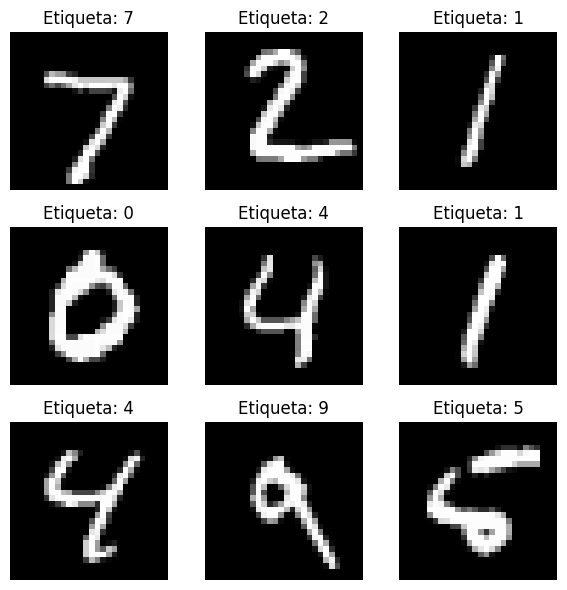

In [3]:
from matplotlib import pyplot as plt

# Mostrar las primeras 9 imágenes del conjunto de prueba
plt.figure(figsize=(6, 6))
for i in range(9):  
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"Etiqueta: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

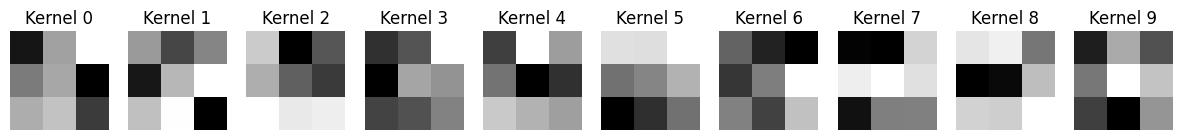

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Acceder a la primera capa convolucional
conv_layer = model.layers[0]
weights, biases = conv_layer.get_weights()

# Mostrar 10 kernels
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    kernel = weights[:, :, 0, i]  # MNIST es en escala de grises
    axes[i].imshow(kernel, cmap='gray')
    axes[i].set_title(f'Kernel {i}')
    axes[i].axis('off')
plt.show()

2. Mostrar las salidas obtenidas al aplicar la convolución de una imagen con los kernels del ejercicio 1.

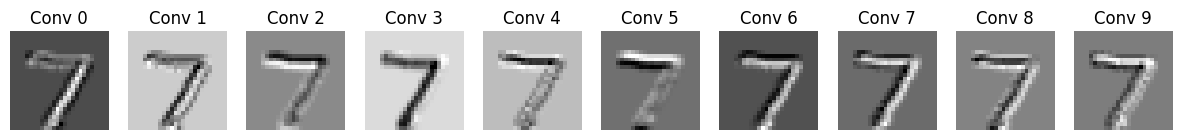

In [5]:
from scipy.signal import convolve2d
from tensorflow.keras.datasets import mnist

(_, _), (x_test, _) = mnist.load_data()
img = x_test[0]  # Tomamos una imagen de ejemplo

# Normalizar
img = img / 255.0

# Aplicar convolución con los primeros 10 kernels
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    kernel = weights[:, :, 0, i]
    convolved = convolve2d(img, kernel, mode='valid')
    axes[i].imshow(convolved, cmap='gray')
    axes[i].set_title(f'Conv {i}')
    axes[i].axis('off')
plt.show()

3. Calcular las predicciones de al menos 10 imágenes propias (adjuntar evidencia del proceso de adquisición de imágenes). Aplicar y explicar el tratamiento de imágenes necesario para adecuar los datos de entrada al modelo.

In [6]:
#Tratamiento de imagenes

import cv2
import os

def procesar_imagenes_entrada(carpeta_entrada='Images', carpeta_salida='imagenes_tratadas'):
    if not os.path.exists(carpeta_salida):
        os.makedirs(carpeta_salida)

    for nombre_archivo in os.listdir(carpeta_entrada):
        ruta_entrada = os.path.join(carpeta_entrada, nombre_archivo)

        # Leer imagen
        img = cv2.imread(ruta_entrada)
        if img is None:
            print(f"No se pudo cargar: {nombre_archivo}")
            continue

        # Procesamiento
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        imgbin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)[1]
        imgbin = 255 - imgbin
        imgbin = cv2.resize(imgbin, (28, 28))

        # Guardar imagen procesada
        nombre_salida = os.path.splitext(nombre_archivo)[0] + '_procesada.jpg'
        ruta_salida = os.path.join(carpeta_salida, nombre_salida)
        cv2.imwrite(ruta_salida, imgbin)
        
procesar_imagenes_entrada('Images', 'imagenes_tratadas')

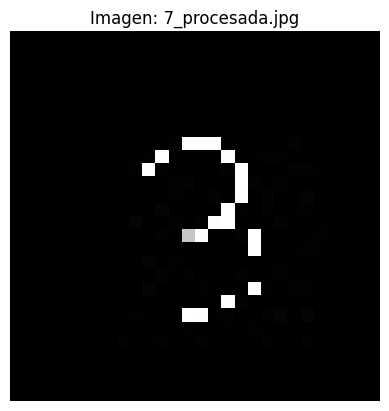

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicción del modelo: 3


In [10]:
#Predecciones del modelo

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


def cargar_imagenes_tratadas(carpeta='imagenes_tratadas'):
    imagenes = []
    nombres = []
    for archivo in os.listdir(carpeta):
        if archivo.endswith('.jpg'):
            ruta = os.path.join(carpeta, archivo)
            img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = img.astype('float32') / 255.0  
                img = np.expand_dims(img, axis=-1)   
                imagenes.append(img)
                nombres.append(archivo)
    return np.array(imagenes), nombres


imagenes, nombres = cargar_imagenes_tratadas('imagenes_tratadas')


idx = 7  # Cambia el índice para probar otras imágenes

img = imagenes[idx]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Imagen: {nombres[idx]}")
plt.axis('off')
plt.show()

prediction = model.predict(np.expand_dims(img, axis=0))
print("Predicción del modelo:", np.argmax(prediction))

4. Repetir el ejercicio 2 con al menos una de las imágenes del ejercicio 3

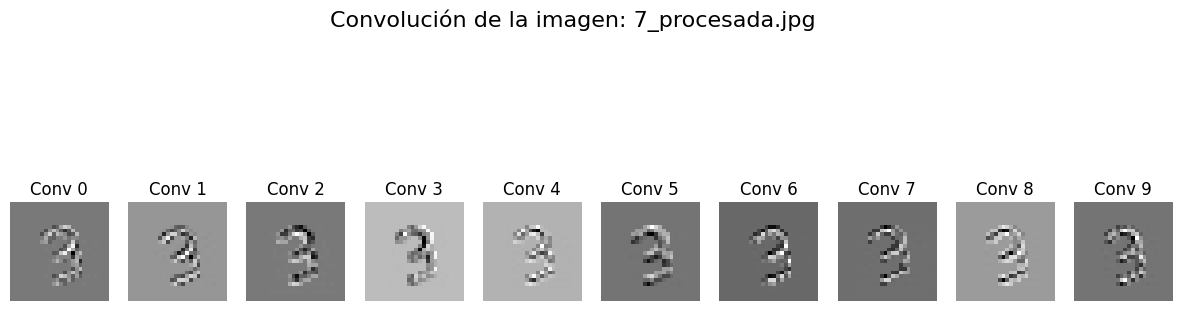

In [ ]:
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Selecciona la imagen tratada que quieres usar (ya cargada previamente)
img_propia = imagenes[idx].squeeze()  # Sacamos dimensiones (28,28)

# Aplicar convolución con los primeros 10 kernels del modelo
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    kernel = weights[:, :, 0, i]  # mismo kernel que usaste antes
    convolved = convolve2d(img_propia, kernel, mode='valid')
    axes[i].imshow(convolved, cmap='gray')
    axes[i].set_title(f'Conv {i}')
    axes[i].axis('off')
plt.suptitle(f'Convolución de la imagen: {nombres[idx]}', fontsize=16)
plt.show()